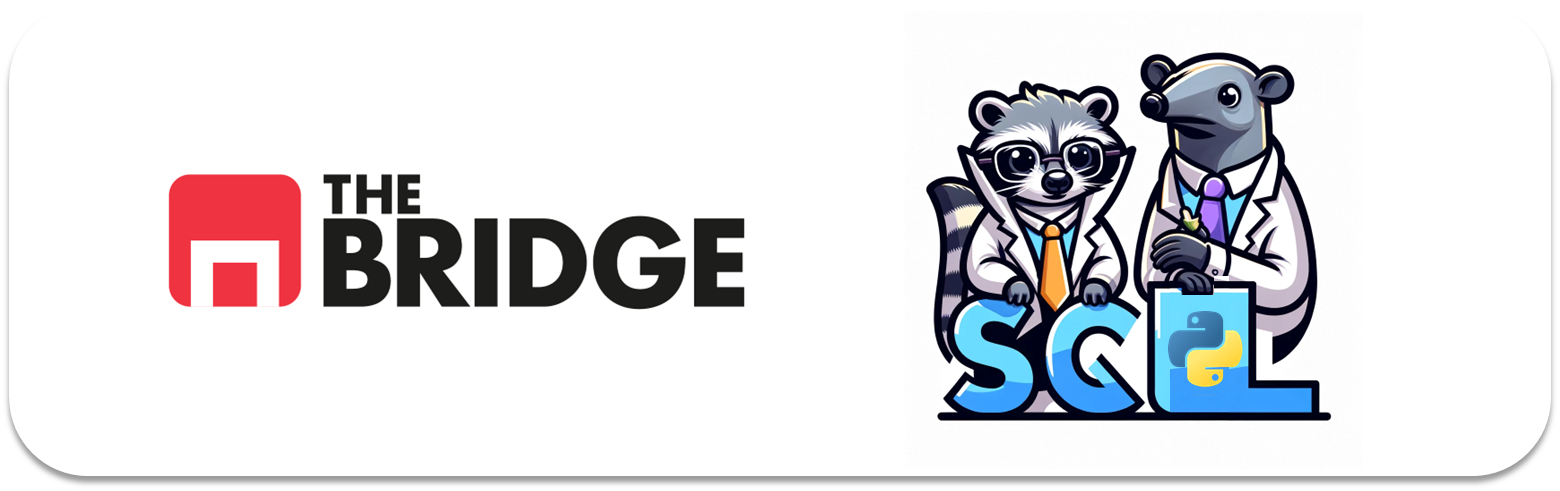

## PRACTICA OBLIGATORIA: SQL

* La práctica obligatoria de esta unidad consiste en jugar con varias tablas de una base de datos y practicar no solo con ellas sino con el método merge de Pandas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import sqlite3

Conectate a la base de datos "Chinook.db" que ya conoces y está en la ruta "./data/chinook.db". Sobre esa conexión crea un cursor para acceder a ella.

In [2]:
conn = sqlite3.connect("./data/chinook.db")

cursor_prac = conn.cursor()

Si quieres, crea una función que te simplifique la ejecución de queries, usa la que has visto en los workouts o bien una que esté basada en pd.read_sql

In [3]:
def sql_query(query):
    cursor_prac.execute(query)
    resultado = cursor_prac.fetchall()
    columnas = [d[0] for d in cursor_prac.description]
    return pd.DataFrame(resultado, columns= columnas)


#### Modelo de Datos

Aquí tienes el modelo de datos, que necesitarás para poder resolver la práctica.

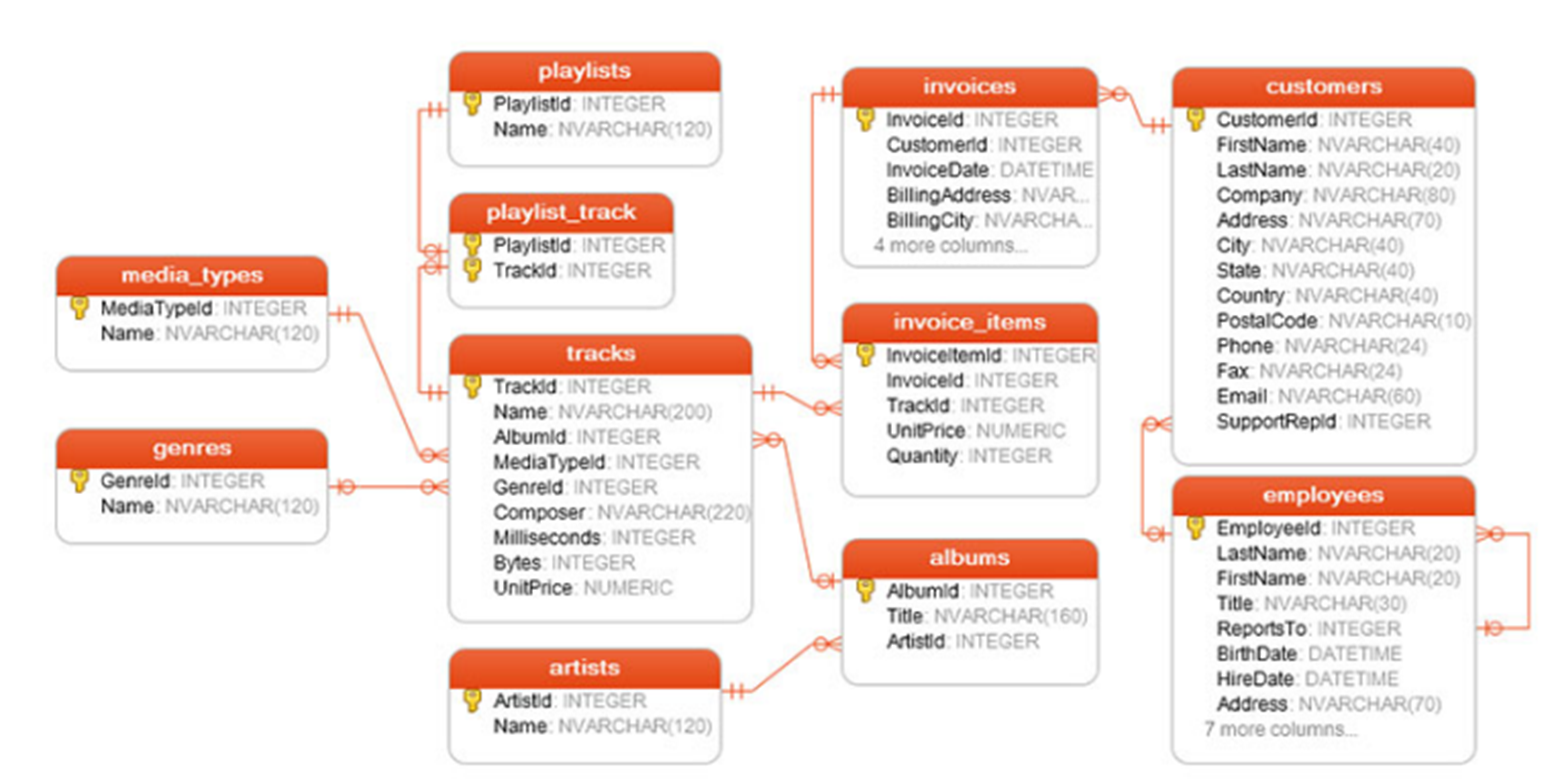

## #1 QUERIES

Queremos realizar algunos análisis sobre la base de datos anterior. Contesta a las siguientes preguntas de dos formas, una empleando SQL, otra descargandote la tabla que sea necesario en un `DataFrame` y resolviéndola usando pandas sobre ese `DataFrame`

### 1.1

Muestra los clientes de Canadá y de Brasil. Utiliza solo el nombre (completo), su identificador y su país. 

Aprendizaje extra que puedes usar:
    En SQL para poder concatenar dos columnas se pueden emplear diversas sintaxis en función del SGDB (del gestor):
```SQL
SELECT CONCAT(campo1, ' ', campo2) AS campo_concatenado
FROM tabla;
```
```SQL
SELECT campo1 + ' ' + campo2 AS campo_concatenado
FROM tabla;
```
```SQL
SELECT campo1 || ' ' || campo2 AS campo_concatenado
FROM tabla;
```

Si quieres usarlo con sqlite, tendrás que emplear la tercera forma.





In [4]:
query = ''' 
SELECT * 
FROM customers
LIMIT 4'''

sql_query(query)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4


In [5]:
# SQL
query = ''' 
SELECT CustomerId AS "id_cliente", FirstName || " " || LastName AS "nombre_completo",  Country AS "país"
FROM customers
WHERE country = "Canada" OR country = "Brazil"
'''
sql_query(query)

,id_cliente,nombre_completo,país
0,1,Luís Gonçalves,Brazil
1,3,François Tremblay,Canada
2,10,Eduardo Martins,Brazil
3,11,Alexandre Rocha,Brazil
4,12,Roberto Almeida,Brazil
5,13,Fernanda Ramos,Brazil
6,14,Mark Philips,Canada
7,15,Jennifer Peterson,Canada
8,29,Robert Brown,Canada
9,30,Edward Francis,Canada


In [6]:
df = sql_query(''' SELECT * FROM customers''')

df[df['Country'].isin(['Canada', 'Brazil'])][['FirstName', 'LastName', 'CustomerId', 'Country']]


,FirstName,LastName,CustomerId,Country
0,Luís,Gonçalves,1,Brazil
2,François,Tremblay,3,Canada
9,Eduardo,Martins,10,Brazil
10,Alexandre,Rocha,11,Brazil
11,Roberto,Almeida,12,Brazil
12,Fernanda,Ramos,13,Brazil
13,Mark,Philips,14,Canada
14,Jennifer,Peterson,15,Canada
28,Robert,Brown,29,Canada
29,Edward,Francis,30,Canada


### 1.2

Muestra una lista con los paises a los que se ha facturado, la lista no debe contener paises repetidos. Recuerda que las facturas están en la tabla `invoices`

In [7]:
sql_query("SELECT * FROM invoices LIMIT 3")

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94


In [8]:
# SQL
query = ''' 
SELECT DISTINCT BillingCountry
FROM invoices
'''
sql_query(query)

,BillingCountry
0,Germany
1,Norway
2,Belgium
3,Canada
4,USA
5,France
6,Ireland
7,United Kingdom
8,Australia
9,Chile


In [9]:
# Pandas
df = sql_query("SELECT * FROM invoices")
df["BillingCountry"].unique()


array(['Germany', 'Norway', 'Belgium', 'Canada', 'USA', 'France',
       'Ireland', 'United Kingdom', 'Australia', 'Chile', 'India',
       'Brazil', 'Portugal', 'Netherlands', 'Spain', 'Sweden',
       'Czech Republic', 'Finland', 'Denmark', 'Italy', 'Poland',
       'Austria', 'Hungary', 'Argentina'], dtype=object)

### 1.3

Muesta cuantos clientes de Estados Unidos hay por estado de Estados Unidos. El resultado debe estar ordenado de mayor a menor. (Nota: En el caso de SQL tendrás que usar el indicador de campo, es decir si es el campo 1,2,3 o n, para la parte de ordenación)

In [10]:
sql_query("SELECT * FROM customers LIMIT 3")

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3


*Se trata de una agrupación por estado de Estados Unidos*

In [11]:
# SQL
query = ''' 
SELECT State, COUNT(CustomerId) 	
FROM customers
GROUP BY State
ORDER BY 2 DESC
'''
sql_query(query)

,State,COUNT(CustomerId)
0,None,29
1,SP,3
2,CA,3
3,ON,2
4,WI,1
5,WA,1
6,VV,1
7,UT,1
8,TX,1
9,RM,1


In [28]:
# Pandas 
df = sql_query("SELECT * FROM customers")

df.groupby("Country")["CustomerId"].sum().sort_values(ascending=False)


Country         CustomerId
Argentina       56            1
USA             16            1
India           58            1
                59            1
Ireland         46            1
Italy           47            1
Netherlands     48            1
Norway          4             1
Poland          49            1
Portugal        34            1
                35            1
Spain           50            1
Sweden          51            1
USA             17            1
                18            1
Germany         2             1
USA             19            1
                20            1
                21            1
                22            1
                23            1
                24            1
                25            1
                26            1
                27            1
                28            1
United Kingdom  52            1
                53            1
Hungary         45            1
Germany         36            1
Australia    

## #2 JOINS

Contesta a las siguientes cuestiones en las que necesitarás hacer JOINs, hazlo en SQL y luego sigue las instrucciones para hacerlo en Pandas

### 2.1

Muestra el nombre de todas las canciones y el género en el que se engloban, lo tengan o no. Llama "Canción" al nombre de la canción y "Género" al nombre del género.


In [13]:
query = ''' 
SELECT a.Name "Canción", b.Name "Género"
FROM tracks AS a
LEFT JOIN genres AS b
ON a.GenreId = b.GenreId
'''
sql_query(query)

,Canción,Género
0,For Those About To Rock (We Salute You),Rock
1,Balls to the Wall,Rock
2,Fast As a Shark,Rock
3,Restless and Wild,Rock
4,Princess of the Dawn,Rock
...,...,...
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Classical
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Classical
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Classical
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Classical


### INCISO: Joins en Pandas

Vamos a hacerlo con pandas, para eso pandas tiene el atributo `merge`. Supongamos que tenemos cada tabla en un dataframe (df1 y df2, por ejemplo), para hacer un join entre ellas que tiene la siguiente sintaxis:

<dataframe1>.merge(<dataframe2>, on = <columna de cruce>, how = <Puede ser "left","right", "inner", "outer">)

+ Si how = "left" -> LEFT JOIN
+ Si how = "right" -> RIGHT JOIN
+ Si how = "inner" -> INNER JOIN
+ Si how = "outer" -> FULL OUTER JOIN

Si la columna de cruce no es la misma, podemos usar:
left_on = "columna del dataframe de la izquierda" (en el caso de arriba `dataframe1`)
right_on = "columna del dataframe de la derecha" (en el caso de arriba `dataframe2`)

Si queremos usar los índices de alguno de los dataframes como columnas de cruce:
left_index = True (usa el índice del `dataframe1`)
right_index = True (usa el índice del `dataframe2`)




### 2.2

Con la información anterior vamos a repetir el ejercicio 2.1, paso a paso. Primero, carga cada tabla necesaria en 2.1 en un  `DataFrame`, llámalos `df_tracks` y `df_genres`.

In [14]:
df_tracks = sql_query("SELECT * FROM tracks")
df_tracks.rename(columns= {"Name" : "Canción"}, inplace=True)
df_genres = sql_query("SELECT * FROM genres")
df_genres.rename(columns= {"Name" : "Género"}, inplace=True)
print(df_tracks)
print(df_genres)


      TrackId                                            Canción  AlbumId  \
0           1            For Those About To Rock (We Salute You)        1   
1           2                                  Balls to the Wall        2   
2           3                                    Fast As a Shark        3   
3           4                                  Restless and Wild        3   
4           5                               Princess of the Dawn        3   
...       ...                                                ...      ...   
3498     3499  Pini Di Roma (Pinien Von Rom) \ I Pini Della V...      343   
3499     3500  String Quartet No. 12 in C Minor, D. 703 "Quar...      344   
3500     3501               L'orfeo, Act 3, Sinfonia (Orchestra)      345   
3501     3502  Quintet for Horn, Violin, 2 Violas, and Cello ...      346   
3502     3503                                      Koyaanisqatsi      347   

      MediaTypeId  GenreId                                           Compos

### 2.3

a. ¿Si colocamos el df_tracks el primero (es decir vamos a hacer df_tracks.merge(df_genres...)), qué valor debe tener el parámetro how? (Ten en cuenta que queremos repetir el mismo JOIN del ejercicio 2.1)  

b. ¿Cuál es la columna de cruce en cada dataframe?¿Usaremos el argumento on, o left_on con right_on?



***a.** how = "left",porque queremos quedarnos con todos los valores de tracks*

***b**. No hace falta incluir los argumentos left_on y right_on porque coincide el nombre de la columna de cruce*

### 2.4

Haz el join de los dos `DataFrames`, asignandolo a un tecer `DataFrame`, llámalo df_join y muéstralo. Observa lo que ocurre en los nombres de las columnas que se llaman igual en los `DataFrames` originales

In [15]:
df_join= df_tracks.merge(df_genres, how= "left")
df_join

,TrackId,Canción,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice,Género
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99,Rock
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99,Rock
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99,Rock
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99,Rock
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99,Rock
...,...,...,...,...,...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,None,286741,4718950,0.99,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99,Classical


### 2.5
Cambia los nombres de las columnas de `df_join` y quedate solo con las que necesites para repetir el resultado de 2.1

In [16]:
df_join= df_join[["Canción", "Género"]]
df_join

,Canción,Género
0,For Those About To Rock (We Salute You),Rock
1,Balls to the Wall,Rock
2,Fast As a Shark,Rock
3,Restless and Wild,Rock
4,Princess of the Dawn,Rock
...,...,...
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Classical
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Classical
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Classical
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Classical


### 2.6

Ahora obten el número de canciones por género y muestra la salida ordenada por ese número de forma descendente. Tanto en SQL como en Pandas. Usa el JOIN que creas conveniente y en la parte de SQL para poder hacer la ordenación recuerda que tendrás que usar la posición de la columna (ORDER BY posicion_columna)

In [17]:
# SQL
query = ''' 
SELECT b.Name "Género", COUNT(a.Name)
FROM tracks AS a
LEFT JOIN genres AS b
ON a.GenreId = b.GenreId
GROUP BY b.Name
ORDER BY 2 DESC
'''
sql_query(query)

,Género,COUNT(a.Name)
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


In [18]:
# Pandas 
df_group = df_join.groupby("Género")["Canción"].sum().sort_values(ascending=False)
df_group

Género
Hip Hop/Rap           ZeroVinteUmQueimando TudoHip Hop RioBossa100% ...
Alternative & Punk    Your Time Has ComeOut Of ExileBe YourselfDoesn...
Heavy Metal           Wildest DreamsRainmakerNo More LiesMontsegurDa...
Alternative           War PigsSay Hello 2 HeavenReach DownHunger Str...
Soundtrack            Vai-Vai 2001X-9 2001Gavioes 2001Nene 2001Rosas...
Comedy                The ConvictA Benihana Christmas, Pts. 1 & 2Bac...
Classical             Symphony No. 3 in E-flat major, Op. 55, "Eroic...
Bossa Nova            Samba Da BênçãoPot-Pourri N.º 4Onde Anda VocêS...
World                 Pura EleganciaChoramingandoPor MerecerNo Futur...
R&B/Soul              Please Please PleaseThinkNight TrainOut Of Sig...
TV Shows              Occupation / PrecipiceExodus, Pt. 1Exodus, Pt....
Easy Listening        My WayStrangers In The NightNew York, New York...
Rock And Roll         MoneyLong Tall SallyBad BoyTwist And ShoutPlea...
Electronica/Dance     Just Another StoryStillness In Time

### 2.7

Obtén ahora los clientes de Alemania (su nombre completo, ciudad y país) pero sólo los que tengan facturas, con el id y la fecha de esa facturas. Hazlo en SQL y extra, voluntario, en Pandas con el método merge. Antes de codificarlo responde: ¿qué tipo de JOIN y por qué?

In [23]:
# SQL
query = ''' 
SELECT a.FirstName || " " || a.LastName AS "nombre_completo", a.Country, a.City, b.InvoiceId, b.InvoiceDate
FROM customers as a
LEFT JOIN invoices AS b
ON a.CustomerId = b.CustomerId
WHERE a.Country = "Germany"
'''
sql_query(query)

,nombre_completo,Country,City,InvoiceId,InvoiceDate
0,Leonie Köhler,Germany,Stuttgart,1,2009-01-01 00:00:00
1,Leonie Köhler,Germany,Stuttgart,12,2009-02-11 00:00:00
2,Leonie Köhler,Germany,Stuttgart,67,2009-10-12 00:00:00
3,Leonie Köhler,Germany,Stuttgart,196,2011-05-19 00:00:00
4,Leonie Köhler,Germany,Stuttgart,219,2011-08-21 00:00:00
5,Leonie Köhler,Germany,Stuttgart,241,2011-11-23 00:00:00
6,Leonie Köhler,Germany,Stuttgart,293,2012-07-13 00:00:00
7,Hannah Schneider,Germany,Berlin,29,2009-05-05 00:00:00
8,Hannah Schneider,Germany,Berlin,40,2009-06-15 00:00:00
9,Hannah Schneider,Germany,Berlin,95,2010-02-13 00:00:00


### 2.8

Obtén ahora los clientes brasileños que hicieron compras y sólo estos, y el número de compras que hicieron. Hazlo en SQL, extra, voluntario, hacerlo en Pandas



In [22]:
#SQL

query = ''' 
SELECT a.FirstName || " " || a.LastName AS "nombre_completo", a.Country, a.City, b.InvoiceId, B.InvoiceDate, COUNT(b.InvoiceID)
FROM customers AS a
LEFT JOIN invoices AS b
ON a.CustomerId = b.CustomerId
WHERE a.Country = "Brazil"
GROUP BY "nombre_completo"
'''
sql_query(query)


,nombre_completo,Country,City,InvoiceId,InvoiceDate,COUNT(b.InvoiceID)
0,Alexandre Rocha,Brazil,São Paulo,57,2009-09-06 00:00:00,7
1,Eduardo Martins,Brazil,São Paulo,25,2009-04-09 00:00:00,7
2,Fernanda Ramos,Brazil,Brasília,35,2009-06-05 00:00:00,7
3,Luís Gonçalves,Brazil,São José dos Campos,98,2010-03-11 00:00:00,7
4,Roberto Almeida,Brazil,Rio de Janeiro,34,2009-05-23 00:00:00,7


### 2.9 

Para terminar, expón desde tu punto de vista las ventajas e inconvenientes de SQL frente a Pandas y dónde crees que puede ser mejor usar uno u otro

* ***SQL** es mucho más intuitivo a la hora de programar qué tabla quiero crear. Además, permite gestionar, unir y fusionar diferentes tablas comprendidas en una base de datos de manera muy ágil. Facilitando así la gestión de grandes cantidades de datos.*
* ***PANDAS** permite analizar datos de manera más rápida dentro del propio código, haciendo las operaciones y modificaciones más sencillas*


**Respuesta de Chatty**
Tanto SQL como Pandas son herramientas poderosas, pero están diseñadas para propósitos diferentes y tienen sus propias ventajas e inconvenientes.

**Ventajas de SQL:**

1. **Declarativo y optimizado para consultas:** SQL es un lenguaje declarativo que permite a los usuarios expresar lo que quieren obtener, no cómo se debe hacer. Los sistemas de gestión de bases de datos (DBMS) pueden optimizar las consultas de manera eficiente.

2. **Escalabilidad y rendimiento:** Las bases de datos SQL están optimizadas para manejar grandes conjuntos de datos y consultas complejas. Pueden escalar eficientemente para manejar grandes volúmenes de datos.

3. **Integridad y consistencia de datos:** Las bases de datos SQL proporcionan mecanismos para garantizar la integridad y consistencia de los datos mediante restricciones, claves foráneas, y otras características.

4. **Uso en entornos multiusuario:** SQL es ideal para entornos donde múltiples usuarios necesitan acceder y manipular datos simultáneamente de manera segura y consistente.

**Inconvenientes de SQL:**

1. **Curva de aprendizaje:** Aprender SQL puede llevar tiempo, especialmente para aquellos que no están familiarizados con la programación de bases de datos.

2. **Flexibilidad limitada:** SQL puede ser menos flexible en comparación con las herramientas de manipulación de datos en memoria como Pandas.

**Ventajas de Pandas:**

1. **Manipulación en memoria:** Pandas opera en memoria, lo que significa que las operaciones se realizan más rápidamente para conjuntos de datos que caben en la RAM.

2. **Flexibilidad y expresividad:** Pandas ofrece una amplia gama de funciones para manipular y transformar datos, y su sintaxis es más expresiva, permitiendo realizar operaciones complejas con menos líneas de código.

3. **Interactividad:** Pandas es ideal para entornos interactivos como Jupyter Notebooks, lo que facilita la exploración y análisis de datos de manera interactiva.

4. **Gran comunidad y recursos:** Pandas es ampliamente utilizado y tiene una comunidad activa, lo que significa que hay muchos recursos y ejemplos disponibles en línea.

**Inconvenientes de Pandas:**

1. **Limitaciones de tamaño de datos:** Pandas puede volverse menos eficiente con conjuntos de datos extremadamente grandes que no caben en la memoria.

2. **No es ideal para sistemas de gestión de bases de datos:** Aunque Pandas es excelente para análisis y manipulación de datos en memoria, no es una solución para la gestión de bases de datos en entornos de producción.

**Cuándo usar uno u otro:**

- **SQL:** Es ideal cuando trabajas con grandes conjuntos de datos almacenados en bases de datos, necesitas consultas complejas y quieres aprovechar las capacidades de optimización de un DBMS. Es esencial para entornos de producción y sistemas de gestión de bases de datos.

- **Pandas:** Es excelente para la exploración y manipulación interactiva de datos en memoria, especialmente en el contexto de análisis de datos y modelado en entornos como Jupyter Notebooks. Es más flexible y expresivo para tareas específicas de manipulación de datos, pero puede no ser la mejor opción para grandes conjuntos de datos que no caben en la memoria.


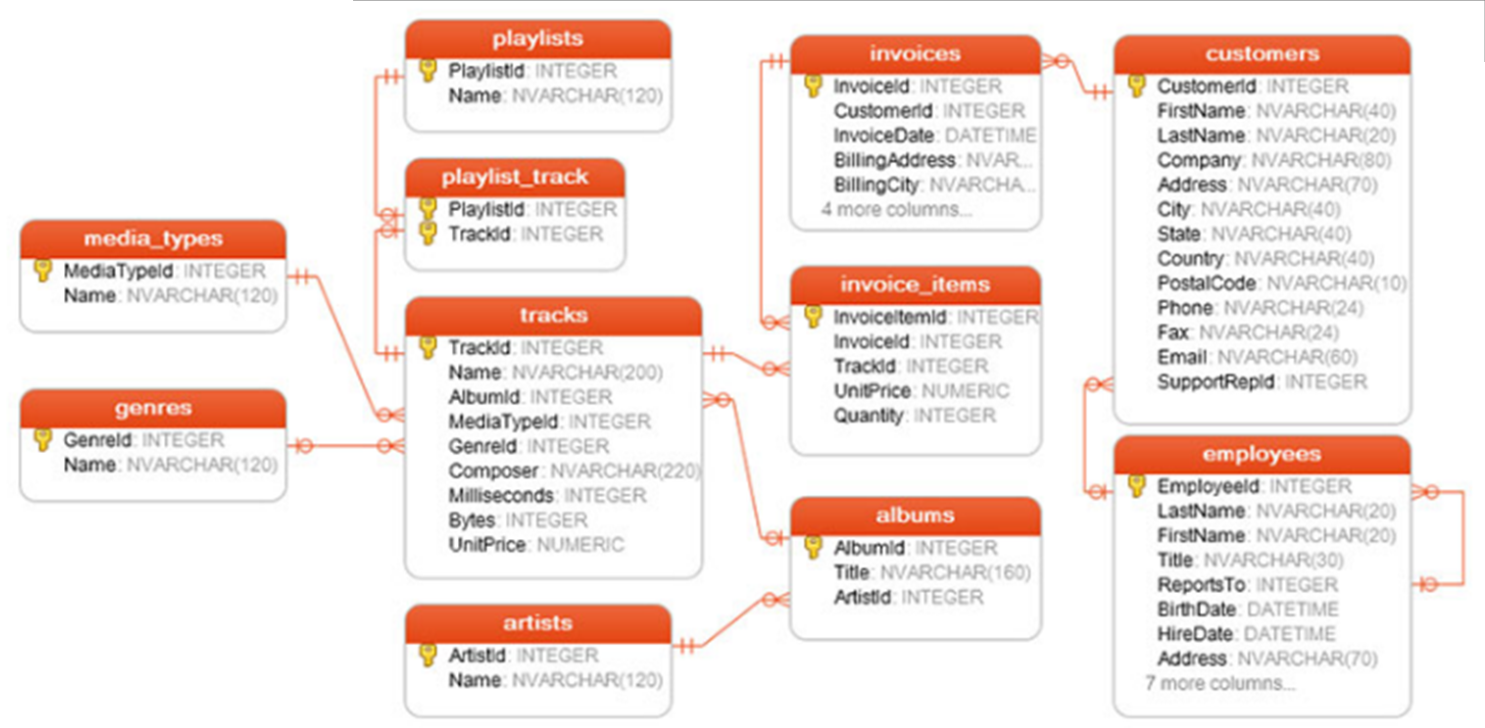

### EXTRA:

Ahora en un triple salto mortal vamos a hacer join de joins para cuando lo que tenemos es que obtener son datos de una tabla que a su vez tiene que cruzarse con una tercer para obtener los datos.

### E1 (5 putos extra en la nota del Sprint)

Muestra los nombres de todas las canciones, el nombre del álbum al que pertenecen y el género. Ten en cuenta que tienes que ligar dos joins juntos de la forma:

```SQL
SELECT campos
FROM tabla
INNER JOIN tabla2 ON tabla.columanCruce = tabla2.columnaCruce
INNER JOIN tabla3 ON tabla.columnaCruce = tabla3.columnaCruce
 ```


In [25]:
query = '''
SELECT a.Name "cancion", b.Title "album", c.Name "genero" 
FROM tracks as a
INNER JOIN albums as b
ON a.albumId = b.albumId
INNER JOIN genres as c
ON a.genreId = c.GenreId
'''
sql_query(query)

,cancion,album,genero
0,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,Rock
1,Balls to the Wall,Balls to the Wall,Rock
2,Fast As a Shark,Restless and Wild,Rock
3,Restless and Wild,Restless and Wild,Rock
4,Princess of the Dawn,Restless and Wild,Rock
...,...,...,...
3498,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Classical
3499,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Classical
3500,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Classical
3501,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Classical


### E2 (10 puntos extra en la nota del Sprint)

Muestra la lista de clientes norteamericanos que compraron canciones y cuáles. 

In [29]:
query = ''' 
SELECT customers.FirstName || " " || customers.LastName AS "nombre_completo", tracks.Name "cancion", COUNT(invoice_items.Quantity)
FROM customers
INNER JOIN invoices ON customers.CustomerId = invoices.CustomerId
INNER JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
INNER JOIN tracks ON invoice_items.TrackID = tracks.TrackId
GROUP BY "nombre_completo"
'''
sql_query(query)

,nombre_completo,cancion,COUNT(invoice_items.Quantity)
0,Aaron Mitchell,How Many More Times,38
1,Alexandre Rocha,Leper Messiah,38
2,Astrid Gruber,Soldier Side - Intro,38
3,Bjørn Hansen,Put The Finger On You,38
4,Camille Bernard,"Prometheus Overture, Op. 43",38
5,Daan Peeters,Dog Eat Dog,38
6,Dan Miller,Bem Devagar,38
7,Diego Gutiérrez,Love Gun,38
8,Dominique Lefebvre,Morena De Angola,38
9,Eduardo Martins,Admirável Gado Novo,38
